<a href="https://colab.research.google.com/github/sidrahahmedAppliedMath/numericalAnalysis/blob/main/nonlinearshooting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[17.    16.703 16.408 16.117 15.832 15.554 15.285 15.027 14.784 14.557
 14.35 ]


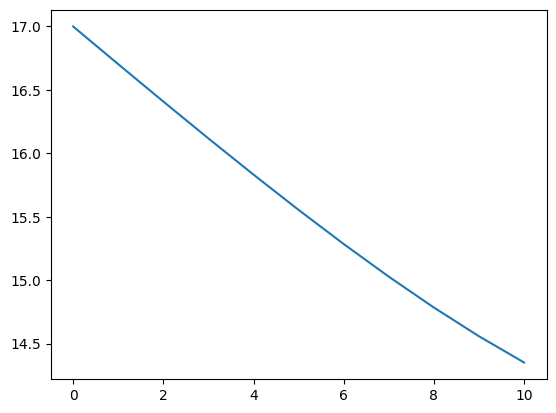

In [31]:
from  numpy import*
from matplotlib import*


def rk4(f1,f2,g1, g2 ,a, b, N, alpha,guess):
  h = (b - a) / N
  t = a
  ansfory = [alpha]
  ansforyp = [0]
  w1 = alpha  #this is y(a)
  w2 = guess   #this is y'(a)
  z1 = 0  # this is z at a
  z2 = 1   # this is z' at a


  for i in range(1, N + 1):
      K11 = h * f1( w2)
      K21 = h * f2(t, w1,w2)
      K12 = h * f1( w2 + K21 / 2)
      K22 = h * f2( t+h/2, w1 + K11 / 2, w2 + K21/2)
      K13 = h * f1( w2 + K22 / 2)
      K23 = h * f2(t + h / 2, w1 + K12 / 2, w2 +K22/2)
      K14 = h * f1( w2 + K23)
      k24 = h * f2(t + h, w1 + K13, w2 + K23)

      w1 = w1 + (K11 + 2 * K12 + 2 * K13 + K14) / 6
      ansfory.append(w1)

      K11p = h * g1(z2)
      K21p = h * g2(w1,w2,z1,z2)
      K12p = h * g1( z2 + K21 / 2)
      K22p = h * g2( w1 + K11 / 2, w2 + K21/2, z1 + K11p/2, z2 + K21p/2)
      K13p = h * g1( z2 + K22p / 2)
      K23p = h * g2(w1 + K12 / 2, w2 +K22/2, z1 + K12p/2, z2 + K22p/2)
      K14p = h * g1( z2 + K23p)
      K24p = h * g2(w1 + K13, w2 + K23, z1 + K13p, z2 + K23p)

      z1 = z1 + (K11p + 2 * K12p + 2 * K13p + K14p) / 6
      ansforyp.append(z1)

      t = a + i * h  # (Compute ti.)



  return ansfory, ansforyp  # get y and z for all points ti





# Usage

# Define f1 and f2 for y''
def f1(yp):
  return yp
def f2(t, y, yp):
  return (32+2*t**3 - y*yp)/8

  # Define g1 and g2 for z''
def g1(zp):
  return zp
def g2(y, yp,z, zp):
  return -(yp*z + y*zp)/8

a = 1
b = 3
N = int(10)
alpha = 17
beta = 43/3
h = (b-a)/N
k = 1
guess = (beta - alpha)/(b-a)
M=5
tol = 1e-4
while k<= M:
 values = rk4(f1, f2, g1, g2, a, b, N, alpha, guess)
 if (values[0][N]-beta)<=tol:
  break
 else:
  guess = guess - (values[0][N]-beta)/values[1][N]
  k = k+1
print(around(values[0],decimals = 3))
pyplot.plot(values[0])